- 정상영업이익증가율 (+): 이익의 증가는 기업의 성장을 의미하므로 높을수록 좋습니다. (%)

- 순이익증가율 (+): 순이익 증가율이 높을수록 기업의 수익성이 향상된 것을 의미합니다. (%)

- 1주당 순이익 (+): 주당 순이익(EPS, Earnings Per Share)이 높을수록 주식 하나가 얻을 수 있는 이익이 높아집니다. (통화 단위)

- 부채비율 (-): 부채비율이 높을수록 기업의 재무 위험이 높아집니다. 따라서 낮을수록 좋습니다. (%)

- 매출액정상영업이익률 (+): 매출액 대비 이익률이 높을수록 기업의 효율성과 수익성이 높은 것을 의미합니다. (%)

- 매출액증가율 (+): 매출 증가율이 높을수록 기업의 성장 가능성이 높아집니다. (%)

- PER (-): 주가수익비율(P/E Ratio)은 주가가 주당 이익(EPS)에 비해 얼마나 높은지를 나타내는 지표로, 낮을수록 주식의 저평가 가능성이 높아집니다.

- PBR (-): 주가순자산비율(P/B Ratio)은 주가가 순자산가치에 비해 얼마나 높은지를 나타내는 지표로, 낮을수록 주식의 저평가 가능성이 높아집니다.

- PCR (-): 주가현금흐름비율(P/CF Ratio)은 주가가 한 주당 현금흐름에 비해 얼마나 높은지를 나타내는 지표로, 낮을수록 주식의 저평가 가능성이 높아집니다.

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
import 특이점장전ver2
import imp
imp.reload(특이점장전ver2)
from 특이점장전ver2 import Singularity

In [3]:
# 12월 데이터를 불러옴
data1 = pd.read_csv('./datasets/kospi사업.csv')
data1.drop('Unnamed: 0', axis=1, inplace=True)
# 6월 데이터를 불러오고 결측치를 제거
data2 = pd.read_csv('./datasets/kospi반기.csv')
data2.drop('Unnamed: 0', axis=1, inplace=True)
data2.fillna(value=0, inplace=True)

# 두 데이터를 합침
df = pd.concat([data1, data2], axis=0)

In [4]:
# 간단하게 데이터를 전처리 해보자
# 퍼센트 단위로 표시된 것들은 100으로 나눠본다
percent_columns = ['정상영업이익증가율', '순이익증가율', '부채비율', '매출액정상영업이익률', '매출액증가율']
df[percent_columns] = df[percent_columns]/100

# 원 단위로 되어있는 1주당순이익은 로그스케일을 취해보자
min_val = df['1주당순이익'].min()
df['1주당순이익'] = df['1주당순이익']+abs(min_val)+1
df['1주당순이익'] = np.log(df['1주당순이익'])

# 거래소 코드를 바로 칠 수 있도록 보완해보자
df['거래소코드'] = df['거래소코드'].astype(str).apply(lambda x: x.zfill(6))

In [5]:
# 2007/6부터 2022/12까지 날짜 정보를 리스트를 받아오자
sl = Singularity()
date_list = sl.getdate()

In [6]:
col_list = ['정상영업이익증가율', '순이익증가율', '1주당순이익', '부채비율', '매출액정상영업이익률', '매출액증가율', 'PER', 'PBR', 'PCR']

In [7]:
# 2007/06부터 2022/12까지 각 기간별로 long 포지션고 short 포지션을 취하는 종목들의 정보를 다 가져와보자
sl = Singularity(df, date_list, col_list)
long_list, short_list = sl.long_short()

In [9]:
# long_list1 ~ long_list9, short_list1 ~ short_list9 한 번에 변수 할당. 1~9 순서는 col_list참조.
# 예를들어 long_list1에는 '정상영업이익증가율'을 기준으로 반기별로 어느 종목에 long 포지션을 취하는지에 대한 정보가 있다.
for k in range(len(col_list)):
    globals()[f"long_list{k+1}"] = []

for k in range(len(col_list)):
    for i in range(int(len(long_list)/len(col_list))):
        globals()[f"long_list{k+1}"].append(long_list[k+9*i])

for k in range(len(col_list)):
    globals()[f"short_list{k+1}"] = []

for k in range(len(col_list)):
    for i in range(int(len(short_list)/len(col_list))):
        globals()[f"short_list{k+1}"].append(short_list[k+9*i])

In [11]:
len(long_list1)

32

In [14]:
sl = Singularity()
rate1 = sl.get_posterior_rate(long_list1, short_list1)
rate2 = sl.get_posterior_rate(long_list2, short_list2)
rate3 = sl.get_posterior_rate(long_list3, short_list3)
rate4 = sl.get_posterior_rate(short_list4, long_list4)
rate5 = sl.get_posterior_rate(long_list5, short_list5)
rate6 = sl.get_posterior_rate(long_list6, short_list6)
rate7 = sl.get_posterior_rate(short_list7, long_list7)
rate8 = sl.get_posterior_rate(short_list8, long_list8)
rate9 = sl.get_posterior_rate(short_list9, long_list9)

0번째 기간 읽어오기 완료
1번째 기간 읽어오기 완료
2번째 기간 읽어오기 완료
3번째 기간 읽어오기 완료
4번째 기간 읽어오기 완료
5번째 기간 읽어오기 완료
6번째 기간 읽어오기 완료
7번째 기간 읽어오기 완료
8번째 기간 읽어오기 완료
9번째 기간 읽어오기 완료
10번째 기간 읽어오기 완료
11번째 기간 읽어오기 완료
12번째 기간 읽어오기 완료
13번째 기간 읽어오기 완료
14번째 기간 읽어오기 완료
15번째 기간 읽어오기 완료
16번째 기간 읽어오기 완료
17번째 기간 읽어오기 완료
18번째 기간 읽어오기 완료
19번째 기간 읽어오기 완료
20번째 기간 읽어오기 완료
21번째 기간 읽어오기 완료
22번째 기간 읽어오기 완료
23번째 기간 읽어오기 완료
24번째 기간 읽어오기 완료
25번째 기간 읽어오기 완료
26번째 기간 읽어오기 완료
27번째 기간 읽어오기 완료
28번째 기간 읽어오기 완료
29번째 기간 읽어오기 완료
30번째 기간 읽어오기 완료
31번째 기간 읽어오기 완료
0번째 기간 읽어오기 완료
1번째 기간 읽어오기 완료
2번째 기간 읽어오기 완료
3번째 기간 읽어오기 완료
4번째 기간 읽어오기 완료
5번째 기간 읽어오기 완료
6번째 기간 읽어오기 완료
7번째 기간 읽어오기 완료
8번째 기간 읽어오기 완료
9번째 기간 읽어오기 완료
10번째 기간 읽어오기 완료
11번째 기간 읽어오기 완료
12번째 기간 읽어오기 완료
13번째 기간 읽어오기 완료
14번째 기간 읽어오기 완료
15번째 기간 읽어오기 완료
16번째 기간 읽어오기 완료
17번째 기간 읽어오기 완료
18번째 기간 읽어오기 완료
19번째 기간 읽어오기 완료
20번째 기간 읽어오기 완료
21번째 기간 읽어오기 완료
22번째 기간 읽어오기 완료
23번째 기간 읽어오기 완료
24번째 기간 읽어오기 완료
25번째 기간 읽어오기 완료
26번째 기간 읽어오기 완료
27번째 기간 읽어오기 완료
28번째 기간 읽어오기 완료
29번째 기간 읽어오기 완료
30번째 기간 읽어오기 완료
31번째 기간 읽어오기

In [16]:
len(rate1)

32

In [17]:
# 약 73분23간의 대장정이 끝났다. 드디어 사후 수익률 데이터를 데이터 프레임으로 만들어보자! 
dates = pd.date_range(start='2007-07-31', end='2023-06-30', freq='6M')

main_data = pd.DataFrame({
    '정상영업이익증가율_fwd': rate1,
    '순이익증가율_fwd': rate2,
    '1주당순이익_fwd': rate3,
    '부채비율_fwd': rate4,
    '매출액정상영업이익률_fwd': rate5,
    '매출액증가율_fwd': rate6,
    'PER_fwd': rate7,
    'PBR_fwd': rate8,
    'PCR_fwd': rate9
}, index=dates)  # 시계열 데이터를 인덱스로 설정

In [19]:
data = main_data

In [20]:
data

,정상영업이익증가율_fwd,순이익증가율_fwd,1주당순이익_fwd,부채비율_fwd,매출액정상영업이익률_fwd,매출액증가율_fwd,PER_fwd,PBR_fwd,PCR_fwd
2007-07-31,-0.009028,-0.009028,0.025275,-0.004133,0.021341,-0.009028,-0.073883,0.009028,-0.121984
2008-01-31,0.008349,0.008349,-0.180852,0.109451,-0.169891,0.008349,0.166240,0.281791,0.096146
2008-07-31,-0.137286,-0.050170,0.094714,0.166594,0.069879,-0.055178,0.056654,0.033319,-0.144205
2009-01-31,-0.034778,-0.228764,-0.161479,0.036530,-0.101166,-0.322396,-0.180767,0.011191,0.049257
2009-07-31,-0.082676,-0.003715,0.085526,0.106874,-0.000203,-0.157084,-0.031997,-0.002138,-0.098280
2010-01-31,0.165137,0.095482,-0.102690,-0.109852,-0.022377,0.086657,0.084133,0.019279,0.093203
2010-07-31,0.226078,0.037554,0.195286,-0.029763,0.050971,0.062328,0.024143,-0.035770,0.019267
2011-01-31,0.125466,0.047835,0.054366,-0.003279,0.027637,-0.042331,0.027477,0.084441,0.024927
2011-07-31,-0.027836,-0.078722,0.092110,0.170905,0.167582,0.055846,-0.112723,-0.020885,-0.079030
2012-01-31,-0.005471,0.003992,0.024587,-0.012362,0.085929,-0.034361,-0.011978,-0.063097,-0.074226


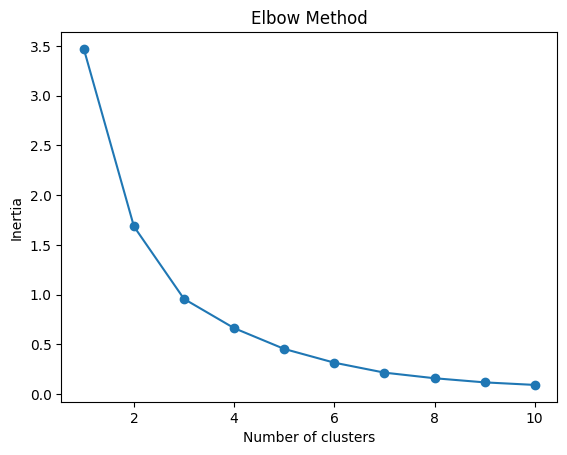

In [21]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 가정: 'data'는 시계열 데이터를 포함하는 1차원 numpy 배열입니다.

# 시계열 데이터를 2차원 배열로 변환
X = np.array(data).reshape(-1, 1)

# 클러스터의 개수를 1부터 10까지 변화시키면서 KMeans 클러스터링 수행
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

# 클러스터의 개수에 따른 Inertia 값 그래프 그리기
plt.plot(range(1, 11), inertias, 'o-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

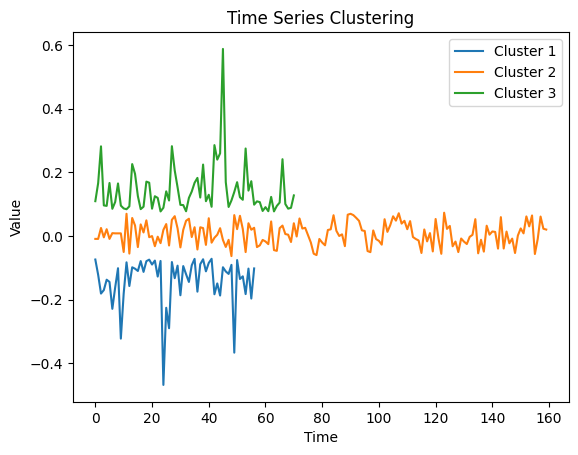

In [31]:
# 최적의 클러스터 개수 선택 (예: 3)
optimal_k = 3

# 최적의 클러스터 개수로 K-means 클러스터링 수행
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X)

# 클러스터링 결과 가져오기
labels = kmeans.labels_

# 시계열 데이터와 클러스터링 결과를 함께 그래프로 표현
for i in range(optimal_k):
    plt.plot(X[labels == i], label=f'Cluster {i+1}')
plt.title('Time Series Clustering')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [34]:
from collections import Counter

# 레이블 별 개수 확인
label_counts = Counter(labels)

# 레이블 별 개수 출력
for label, count in label_counts.items():
    print(f'Label {label}: {count}개')

Label 1: 160개
Label 0: 57개
Label 2: 71개


In [35]:
labels

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1,
       0, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 0, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1])

In [36]:
data.to_csv('사후수익률_반년단위.csv')

In [51]:
dates = pd.date_range(start='2007-07-31', end='2023-06-30', freq='M')
dates = dates.to_list()

In [52]:
main_data = pd.DataFrame(index=dates, data=rate1)

In [37]:
pd.read_csv('사후수익률_반년단위.csv')

,Unnamed: 0,정상영업이익증가율_fwd,순이익증가율_fwd,1주당순이익_fwd,부채비율_fwd,매출액정상영업이익률_fwd,매출액증가율_fwd,PER_fwd,PBR_fwd,PCR_fwd
0,2007-07-31,-0.009028,-0.009028,0.025275,-0.004133,0.021341,-0.009028,-0.073883,0.009028,-0.121984
1,2008-01-31,0.008349,0.008349,-0.180852,0.109451,-0.169891,0.008349,0.166240,0.281791,0.096146
2,2008-07-31,-0.137286,-0.050170,0.094714,0.166594,0.069879,-0.055178,0.056654,0.033319,-0.144205
3,2009-01-31,-0.034778,-0.228764,-0.161479,0.036530,-0.101166,-0.322396,-0.180767,0.011191,0.049257
4,2009-07-31,-0.082676,-0.003715,0.085526,0.106874,-0.000203,-0.157084,-0.031997,-0.002138,-0.098280
5,2010-01-31,0.165137,0.095482,-0.102690,-0.109852,-0.022377,0.086657,0.084133,0.019279,0.093203
6,2010-07-31,0.226078,0.037554,0.195286,-0.029763,0.050971,0.062328,0.024143,-0.035770,0.019267
7,2011-01-31,0.125466,0.047835,0.054366,-0.003279,0.027637,-0.042331,0.027477,0.084441,0.024927
8,2011-07-31,-0.027836,-0.078722,0.092110,0.170905,0.167582,0.055846,-0.112723,-0.020885,-0.079030
9,2012-01-31,-0.005471,0.003992,0.024587,-0.012362,0.085929,-0.034361,-0.011978,-0.063097,-0.074226


### 요기까지가 데이터 읽어오기 끄으읕~~~. 밑에꺼는 뭐 여러 시행착오들...

In [15]:
default_date = datetime.strptime('2007-07-01', '%Y-%m-%d')  # 초기 시간(2007년7월1일)
date = default_date 

In [16]:
date+relativedelta(months=6)

datetime.datetime(2008, 1, 1, 0, 0)

In [37]:
# 각 팩터별로 사후수익률을 구해보자
rate_sum = []   # 1개월 단위로한 해당팩터기준 사후 수익률 데이터를 저장하기위한 변수

default_date = datetime.strptime('2007-07-01', '%Y-%m-%d')  # 초기 시간(2007년7월1일)
date = default_date 


for i in range(len(long_list1)):
    
    # 특정 기간에서 특정 팩터 기준으로 long치거나 short칠 종목
    long_tem = long_list1[i]
    short_tem = short_list1[i]

    # 월 바뀌었으니 값 갱신해야져 ~~.
    temp_31_long_list = [0,0,0,0,0,0]
    temp_1_long_list = [0,0,0,0,0,0]
    temp_31_short_list = [0,0,0,0,0,0]
    temp_1_short_list = [0,0,0,0,0,0]

    # 상위 20% 데이터 롱치자
    for k in long_tem:
            
        temp_lastday = date+relativedelta(months=6)-timedelta(days=1)
        temp = fdr.DataReader(k, date, temp_lastday)

        if temp.empty != True:
            unique_num = len((temp.index.month).unique())
            for j in range(6, 6-unique_num, -1):
                # 상장 안되서 데이터가 없으면 패스함.
                last_month = temp.index.month[-1]
                temp_data = temp[temp.index.month == (last_month-(6-j))]

                temp_len = len(temp_data['Close'])
                temp_31_long_list[j-1] = temp_31_long_list[j-1] + temp_data['Close'].iloc[temp_len-1]     # 월 마지막날의 종가
                temp_1_long_list[j-1] = temp_1_long_list[j-1] + temp_data['Close'].iloc[0]                # 월 시작일의 종가
        

    # for m in range(6):
    #     temp_rate = (temp_31_long_list[m] - temp_1_long_list[m])/(temp_1_long_list[m])                 
    #     long_rate_sum.append(temp_rate)                                                 # 1개월 동안의 롱포지션 사후 수익률

    # 하위 20% 데이터 숏치자
    for k_ in short_tem:
            
        temp_lastday2 = date+relativedelta(months=6)-timedelta(days=1)
        temp2 = fdr.DataReader(k_, date, temp_lastday2)

        if temp2.empty != True:
            unique_num2 = len((temp2.index.month).unique())
            for j in range(6, 6-unique_num2, -1):
                # 상장 안되서 데이터가 없으면 패스함.
                last_month2 = temp2.index.month[-1]
                temp_data2 = temp2[temp2.index.month == (last_month2-(6-j))]

                temp_len2 = len(temp_data2['Close'])
                temp_31_short_list[j-1] = temp_31_short_list[j-1] + temp_data2['Close'].iloc[temp_len2-1]     # 월 마지막날의 종가
                temp_1_short_list[j-1] = temp_1_short_list[j-1] + temp_data2['Close'].iloc[0]                # 월 시작일의 종가

                # temp_short_31sum = temp_short_31sum + temp_data2['Close'].iloc[temp_len2-1]     # 월 마지막날의 종가
                # temp_short_1sum = temp_short_1sum + temp_data2['Close'].iloc[0]                # 월 시작일의 종가

    # for m in range(6):
    #     temp_rate2 = -(temp_31_short_list[m] - temp_1_short_list[m])/(temp_1_short_list[m])                 
    #     short_rate_sum.append(temp_rate2)
                              
    for m in range(6):
        temp_rate = (temp_31_long_list[m] - temp_31_short_list[m] - temp_1_long_list[m] + temp_1_short_list[m])/(temp_1_long_list[m]-temp_1_short_list[m])
        rate_sum.append(temp_rate)     

    print(f'{i}번째 기간 읽어오기 완료')           
    date = date + relativedelta(months=6)   # 1개월 경과

0번째 기간 읽어오기 완료
1번째 기간 읽어오기 완료
2번째 기간 읽어오기 완료
3번째 기간 읽어오기 완료


KeyboardInterrupt: 

In [27]:
ddd[ddd.index.month == 7]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2007-07-02,87630,91726,87249,91155,58488,0.036842
2007-07-03,90583,92964,90488,92965,63693,0.019856
2007-07-04,92964,97155,92583,96679,126214,0.039951
2007-07-05,96679,99536,95726,98108,104849,0.014781
2007-07-06,98108,100489,95250,97632,106738,-0.004852
2007-07-09,96203,97631,94869,96203,60252,-0.014637
2007-07-10,96679,102870,96203,100013,87970,0.039604
2007-07-11,99060,104775,98584,101918,101191,0.019048
2007-07-12,101918,117158,101918,113348,224033,0.112149


In [29]:
ddd.index.month

Index([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=122)

In [80]:
# 각 팩터별로 사후수익률을 구해보자
rate_sum = []   # 1개월 단위로한 해당팩터기준 사후 수익률 데이터를 저장하기위한 변수
default_date = datetime.strptime('2007-07-01', '%Y-%m-%d')  # 초기 시간(2007년7월1일)
date = default_date 


for i in range(len(long_list1)):
    
    # 특정 기간에서 특정 팩터 기준으로 long치거나 short칠 종목
    long_tem = long_list1[i]
    short_tem = short_list1[i]

    for j in range(6):

        # 월 바뀌었으니 값 갱신해야져 ~~.
        temp_long_1sum = 0
        temp_long_31sum = 0
        temp_short_1sum = 0
        temp_short_31sum = 0

        # 상위 10% 데이터 롱치자
        for k in long_tem:
            
            temp_lastday = date+relativedelta(months=1)-timedelta(days=1)
            temp_data = fdr.DataReader(k, date, temp_lastday)

            # 상장 안되서 데이터가 없으면 패스함.
            if temp_data.empty != True:

                temp_len = len(temp_data['Close'])
                temp_long_31sum = temp_long_31sum + temp_data['Close'].iloc[temp_len-1]     # 월 마지막날의 종가
                temp_long_1sum = temp_long_1sum + temp_data['Close'].iloc[0]    # 월 시작일의 종가

        # 하위 10% 데이터 숏치자
        for k in short_tem:
            
            temp_lastday = date+relativedelta(months=1)-timedelta(days=1)
            temp_data = fdr.DataReader(k, date, temp_lastday)

            # 상장 안되서 데이터가 없으면 패스함.
            if temp_data.empty != True:

                temp_len = len(temp_data['Close'])
                temp_short_31sum = temp_short_31sum + temp_data['Close'].iloc[temp_len-1]   # 월 마지막날의 종가
                temp_short_1sum = temp_short_1sum + temp_data['Close'].iloc[0]      # 월 시작일의 종가

        temp_rate = ((temp_long_31sum - temp_long_1sum)-(temp_short_31sum - temp_short_1sum))/(temp_long_1sum-temp_short_1sum)  # 1개월 동안의 사후 수익률
        rate_sum.append(temp_rate)  # 1개월 동안의 사후 수익률 데이터를 저장한다
        date = date + relativedelta(months=1)   # 1개월 경과

In [120]:
rate_sum

[0.11714776195320448,
 -0.030189460810904106,
 0.06100526548494714,
 0.012011757390763666,
 -0.010978117197826407,
 -0.1013998138448342,
 -0.27190176527680815,
 0.1605287946837616,
 -0.001021039077434469,
 -0.04189804141691558,
 0.017599749629463417,
 -0.15868425551313464,
 -0.015596365717210691,
 -0.29163375054132207,
 0.33601822154951305,
 -0.770808721255803,
 -9.70483807028732,
 -0.495644244494758,
 0.043716148781651996,
 -0.01808739123741946,
 0.03641998745419129,
 0.05859594307613445,
 -0.11307619668098999,
 -0.02861812253551667]

In [119]:
monthly_rate_sum

[0.11714776195320448,
 -0.030189460810904106,
 0.06100526548494714,
 0.012011757390763666,
 -0.010978117197826407,
 -0.1013998138448342,
 -0.27190176527680815,
 0.1605287946837616,
 -0.001021039077434469,
 -0.04189804141691558,
 0.017599749629463417,
 -0.15868425551313464,
 -0.015596365717210691,
 -0.29163375054132207,
 0.33601822154951305,
 -0.770808721255803,
 -9.70483807028732,
 -0.495644244494758]

In [76]:
returns = [0.1, 0.05]

# 각 수익률에 1을 더하고 그 결과를 모두 곱함
product = np.prod([1 + r for r in returns])

# 거래 수의 역수를 지수로 적용하여 기하 평균을 계산하고, 마지막으로 1을 빼서 최종 수익률을 계산
geo_mean_return = product**(1.0/len(returns)) - 1

In [77]:
geo_mean_return

0.07470926301023395

In [68]:
date

datetime.datetime(2009, 7, 1, 0, 0)

In [ ]:
['047810',
 '068270',
 '004000',
 '042660',
 '004490',
 '001230',
 '010060',
 '008770',
 '001120',
 '006040',
 '004020',
 '081660']

In [71]:
fdr.DataReader('004000', '2009-01-01', '2009-06-30')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,38700,38750,37700,38700,139062,0.006502
2009-01-05,39250,39250,38200,38500,204523,-0.005168
2009-01-06,38650,39200,38300,38500,163736,0.000000
2009-01-07,38800,41000,38400,40300,288823,0.046753
2009-01-08,40100,42000,40100,41250,272547,0.023573
...,...,...,...,...,...,...
2009-06-24,53100,53400,50700,51500,613422,0.000000
2009-06-25,51800,53500,51100,53500,410893,0.038835
2009-06-26,54000,55000,53400,54300,519252,0.014953


In [60]:
long_list1[4]

['068270',
 '006650',
 '047810',
 '036570',
 '011170',
 '003240',
 '028050',
 '051600',
 '014680',
 '009830',
 '000270',
 '010780']

In [ ]:
fdr.DataReader(k, date, temp_lastday)

In [62]:
df_krx = fdr.StockListing('KRX')

In [65]:
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,71800,1,300,0.42,71800,71900,70900,15373696,1098192684298,428630387090000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,588000,1,3000,0.51,591000,592000,582000,271773,159432971000,137592000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,118900,2,-100,-0.08,117300,119800,116300,4303391,508120276437,86559481198500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,775000,2,-3000,-0.39,780000,783000,772000,96808,75109548000,55159850000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,743000,1,21000,2.91,727000,754000,725000,355710,263984930000,52450110849000,70592343,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,245450,KR7245450002,씨앤에스링크,KONEX,일반기업부,1588,2,-11,-0.69,1588,1588,1588,1,1588,2508976480,1579960,KNX
2719,288490,KR7288490006,나라소프트,KONEX,일반기업부,57,1,1,1.79,58,59,54,133116,7473083,2174379000,38147000,KNX
2720,000547,KR7000542001,흥국화재2우B,KOSPI,,10100,2,-10,-0.10,11600,11600,10100,12449,129538680,1551360000,153600,STK
2721,322190,KR7322190000,베른,KONEX,일반기업부,154,1,18,13.24,120,154,120,708,90434,1374480338,8925197,KNX


In [59]:
long_list1[3]

['047810',
 '068270',
 '004000',
 '042660',
 '004490',
 '001230',
 '010060',
 '008770',
 '001120',
 '006040',
 '004020',
 '081660']

In [46]:
len(long_sum )

20

In [79]:
long_sum

[-0.003718002978478463,
 -0.006477354023819548,
 0.006815947774257314,
 -0.008278722287385798,
 0.005446656403799155,
 -0.010962361125025688,
 -0.05855089842237182,
 0.027650946846083935,
 -0.011918983761107893,
 -0.016503048660450825,
 -0.0020025022167031725,
 -0.023700948549456924,
 -0.005365726462584597,
 -0.03471634866660622,
 0.029258819380266088,
 -0.10933382615138054,
 -0.17231896426556692,
 0.08472087347766455,
 0.016310757172698587,
 0.015774956867502965,
 -0.10208424421614448,
 -0.04133520111832245,
 -0.03484613083952526,
 -0.0017140372359458755]

In [84]:
print(np.round(rate_sum, 3))

[ 1.170e-01 -3.000e-02  6.100e-02  1.200e-02 -1.100e-02 -1.010e-01
 -2.720e-01  1.610e-01 -1.000e-03 -4.200e-02  1.800e-02 -1.590e-01
 -1.600e-02 -2.920e-01  3.360e-01 -7.710e-01 -9.705e+00 -4.960e-01
  4.400e-02 -1.800e-02  3.600e-02  5.900e-02 -1.130e-01 -2.900e-02]


In [73]:
long_sum

[44319,
 5365,
 5828,
 24668,
 -32257,
 -15833,
 -146810,
 62478,
 10853,
 -9202,
 13172,
 -84296,
 36083,
 -387942,
 112552,
 -952199,
 -163960,
 251693,
 8524,
 -19010,
 57186,
 53168,
 -24733,
 -13271]